<a href="https://colab.research.google.com/github/kabir993/chandan-goswami-854331/blob/main/customer_churn_prediction_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset=pd.read_csv('/content/5 customer.csv')
dataset.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0


In [ ]:
dataset.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [ ]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]

In [ ]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [ ]:
input_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [ ]:
input_data.shape

(10000, 8)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras .regularizers import l2

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(6, input_dim=8, activation='relu',kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)


In [ ]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks=[EarlyStopping()])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7918 - loss: 0.6300 - val_accuracy: 0.8035 - val_loss: 0.5486
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.5558 - val_accuracy: 0.8035 - val_loss: 0.5220
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.5275 - val_accuracy: 0.8035 - val_loss: 0.5120
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.5266 - val_accuracy: 0.8035 - val_loss: 0.5066
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.5123 - val_accuracy: 0.8035 - val_loss: 0.5039
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.5240 - val_accuracy: 0.8035 - val_loss: 0.5025
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.5124 - val_accuracy: 0.8035 - val_loss: 0.5019
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.5146 - val_accuracy: 0.8035 - val_loss:

In [ ]:
training_accuracy=ann.history.history["accuracy"]
testing_accuracy=ann.history.history["val_accuracy"]

In [ ]:
len(training_accuracy)

11

In [ ]:
len(testing_accuracy)

11

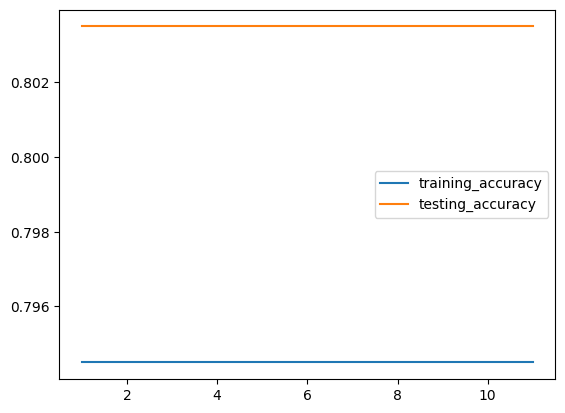

In [ ]:
plt.plot([i for i in range(1,12)],training_accuracy,label="training_accuracy")
plt.plot([i for i in range(1,12)],testing_accuracy,label="testing_accuracy")
plt.legend()
plt.show()
plt.show()

In [ ]:
ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.21957768],
       [0.21957768],
       [0.21957768],
       ...,
       [0.21957768],
       [0.21957768],
       [0.21957768]], dtype=float32)

In [ ]:
prd_data=[]
for i in ann.predict(x_test):
  if i[0]>0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
prd1=ann.predict(x_train)



250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
prd_data1=[]
for i in prd1:
  if i[0]>0.5:
    prd_data1.append(1)
  else:
    prd_data1.append(0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prd_data)

0.8035

In [ ]:
accuracy_score(y_train,prd_data1)

0.7945